# Desarrollo

## Punto 1


In [10]:
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from yahoo_fin.stock_info import get_data

In [11]:
sns.set_theme()
sns.set_context("paper")

In [12]:
stock = 'BTC-USD'
resolution = '1d'
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

In [13]:
def date_format(date_h):
    return date_h.strftime('%d/%m/%Y')

In [14]:
BTC_df = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)
BTC_df.head()

date          open          high           low         close  \
0 2023-04-16  30315.976562  30555.537109  30157.832031  30315.355469   
1 2023-04-17  30317.146484  30319.197266  29275.371094  29445.044922   
2 2023-04-18  29449.091797  30470.302734  29154.849609  30397.552734   
3 2023-04-19  30394.187500  30411.054688  28669.898438  28822.679688   
4 2023-04-20  28823.683594  29076.400391  28037.257812  28245.988281   

       adjclose        volume   ticker  
0  30315.355469  1.285482e+10  BTC-USD  
1  29445.044922  1.787219e+10  BTC-USD  
2  30397.552734  1.948053e+10  BTC-USD  
3  28822.679688  2.457157e+10  BTC-USD  
4  28245.988281  2.134036e+10  BTC-USD

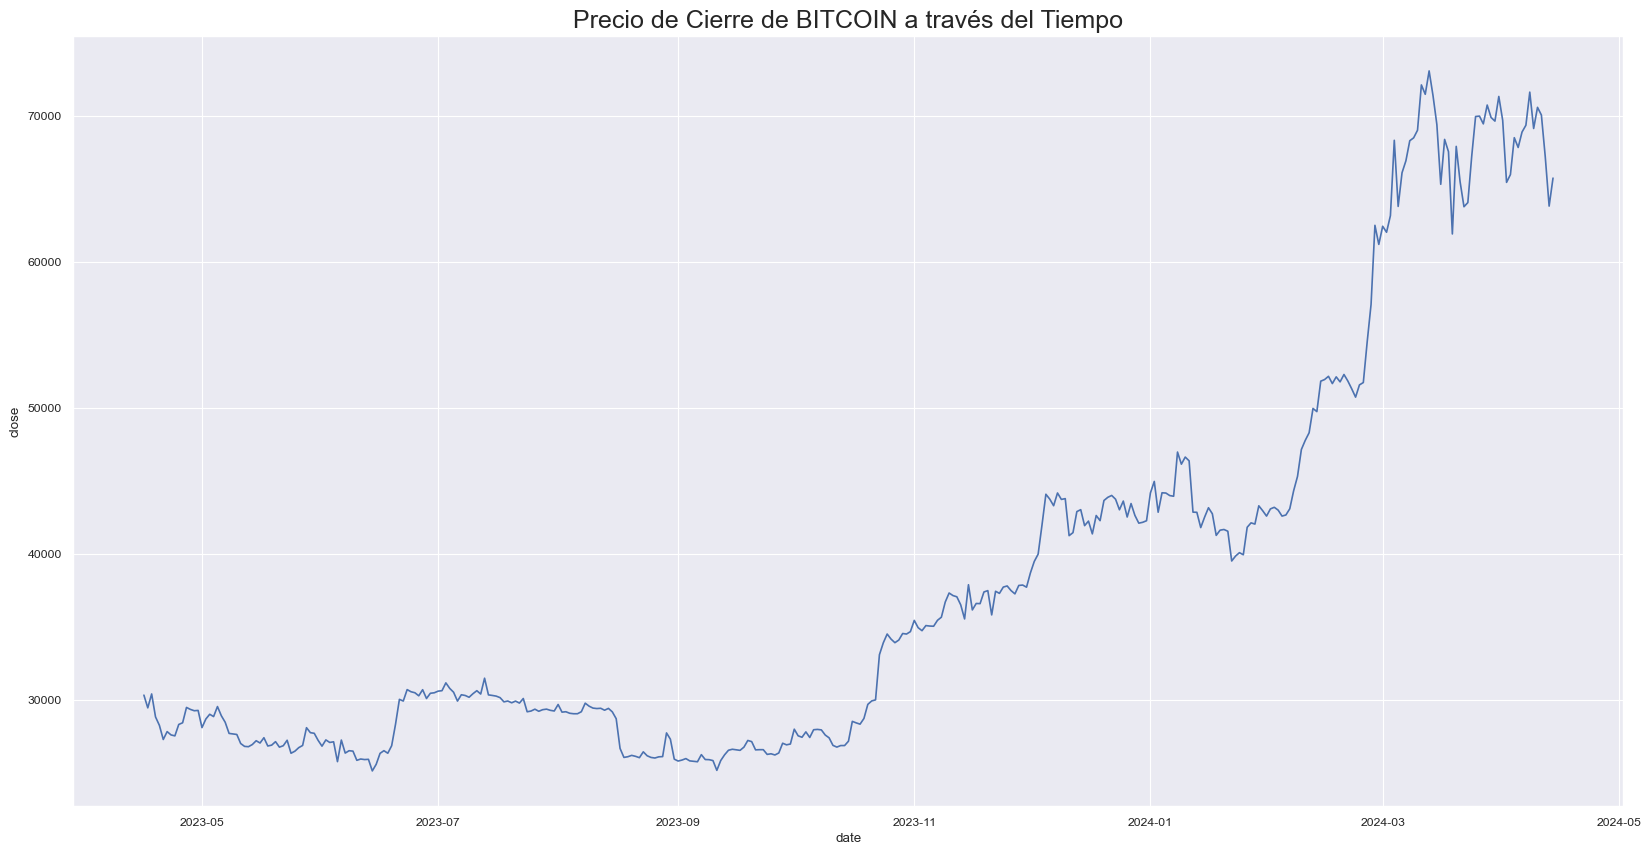

In [15]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=BTC_df, x=BTC_df.date, y=BTC_df.close)
plt.title('Precio de Cierre de BITCOIN a través del Tiempo',size=18);

El gráfico muestra la evolución del precio de cierre del Bitcoin a lo largo del tiempo. 

Algunos aspectos destacables del gráfico:
1. Presenta una tendencia creciente general, con varias subidas y bajadas pronunciadas a lo largo del período mostrado.
2. Desde principios de 2023 hasta abril de 2024, se observa una tendencia creciente más marcada, con el precio del Bitcoin alcanzando niveles máximos históricos cercanos a los 70,000 dólares.
3. Sin embargo, en los últimos meses del período analizado (abril-mayo 2024), se aprecia una corrección a la baja, con el precio de Bitcoin retrocediendo de forma significativa.
4. La volatilidad del precio de Bitcoin es muy alta, con fuertes fluctuaciones en períodos de tiempo relativamente cortos, lo que refleja la naturaleza especulativa y dinámica de este mercado.

In [16]:
import plotly.graph_objects as go
from IPython.display import HTML

fig = go.Figure(data=[go.Candlestick(x = BTC_df.date,
                                     open = BTC_df.open, 
                                     high = BTC_df.high,
                                     low = BTC_df.low, 
                                     close = BTC_df.close)
                     ])
fig.update_layout(
    title="BITCOIN (BTC)",
    xaxis_title="Day",
    yaxis_title="BTC-USD",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
    )
)

fig.write_html('fig.html')
HTML(filename='fig.html')

El gráfico de velas es un estilo de gráfico financiero que describe la apertura, el máximo, el mínimo y el cierre.  Los recuadros representan la dispersión entre los valores de apertura y cierre y las líneas representan la dispersión entre los valores bajos y altos. Los puntos de muestra en los que el valor de cierre es mayor (menor) que el de apertura se denominan crecientes (decrecientes).

Para el Stock de BITCOIN se puede apreciar una tendencia creciente en a lo largo de los últimos dos año, manteniéndose en la actualidad en niveles entre 65k-70k.

## Punto 2

In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [18]:
BTC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      366 non-null    datetime64[ns]
 1   open      365 non-null    float64       
 2   high      365 non-null    float64       
 3   low       365 non-null    float64       
 4   close     365 non-null    float64       
 5   adjclose  365 non-null    float64       
 6   volume    365 non-null    float64       
 7   ticker    366 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 23.0+ KB


In [19]:
BTC_df.nunique()

date        366
open        365
high        365
low         364
close       365
adjclose    365
volume      365
ticker        1
dtype: int64

In [20]:
BTC_df = BTC_df.dropna()

Se realiza la prueba estadística Dickey-Fuller para verificar si la serie de tiempo es estacionaria o no. Si p-value > 0.05 no rechazamos nuestra hipótesis inicial.

$H_0$: La serie de tiempo no es estacionaria

Se rechaza $H_0$, la serie de tiempo es estacionaria.

In [21]:
result = adfuller(BTC_df.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.143479
p-value: 0.944932


In [22]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

Realizaremos ahora figuras de autocorrelación para confirmar que la serie de tiempo diferenciada es estacionaria, así como también para verificar cuál es el orden de integración necesario para llevar nuestra serie de tiempo no estacionaria a una estacionaría.

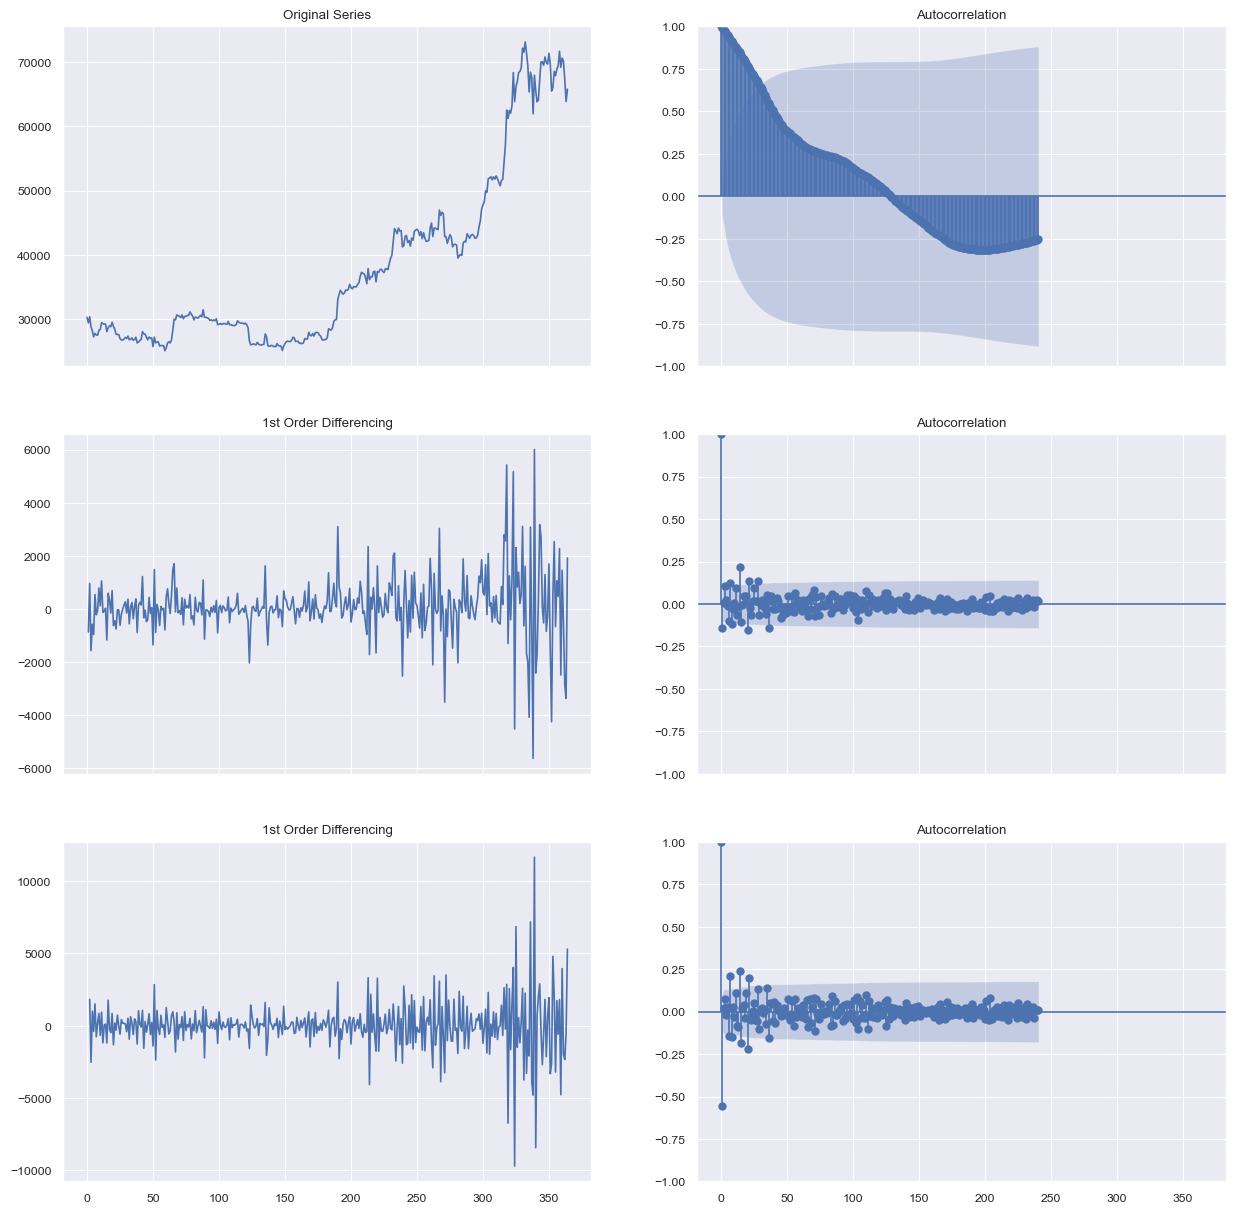

In [23]:
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(BTC_df.close); axes[0, 0].set_title('Original Series')
plot_acf(BTC_df.close, ax=axes[0, 1], lags = 240);

axes[1, 0].plot(BTC_df.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(BTC_df.close.diff().dropna(), ax=axes[1, 1], lags = 240);

axes[2, 0].plot(BTC_df.close.diff().diff()); axes[2, 0].set_title('1st Order Differencing')
plot_acf(BTC_df.close.diff().diff().dropna(), ax=axes[2, 1], lags = 240);

Este gráfico muestra:
1. Original Series (Gráfico a la izquierda):
   - Este gráfico representa la evolución de la serie de datos original a lo largo del tiempo. Se puede ver que los valores fluctúan entre aproximadamente 30,000 y 70,000.

2. Autocorrelation (Gráfico a la derecha):
   - Este gráfico muestra el análisis de autocorrelación de la serie de datos original.
   - La autocorrelación mide la correlación de la serie consigo misma desplazada en el tiempo. Permite identificar patrones y ciclos repetitivos en los datos.
   - En este caso, se observa que los coeficientes de autocorrelación decaen rápidamente a medida que aumenta el rezago, lo que sugiere que la serie no presenta una estructura de correlación temporal fuerte.
3. 1st Order Differencing: 
   - Este gráfico muestra la primera diferencia de la serie original, es decir, la diferencia entre cada valor y el valor anterior.
   - Se puede observar que la serie diferenciada presenta una mayor variabilidad y volatilidad, con picos y valles más pronunciados en comparación con la serie original.
   - Esto indica que la serie original tiene un comportamiento no estacionario, con tendencias y/o estacionalidad que se han eliminado al calcular la primera diferencia.
4. Autocorrelation:
   - Este gráfico muestra el análisis de autocorrelación de la serie diferenciada.
   - En este caso, el gráfico de autocorrelación muestra una estructura típica de un proceso autorregresivo (AR) o de media móvil (MA), con un decaimiento exponencial o senoidal de los coeficientes de autocorrelación.
   - Esto sugiere que la serie diferenciada presenta una estructura de dependencia temporal que puede ser modelada utilizando técnicas de series de tiempo como ARIMA.

### Criterio AIC

Primero, dividimos los datos en entrenamiento y prueba:

In [24]:
n_BTC = len(BTC_df.close); n_test = 28
train_size = n_BTC - n_test

In [25]:
train = BTC_df.close[:train_size]
dates_train = BTC_df.date[:train_size]
test = BTC_df.close[train_size:train_size + n_test] 
dates = BTC_df.date[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_4w:", test.shape)

train: (337,)
test_4w: (28,)


Buscamos el mejor modelo ARIMA usando el conjunto de entrenamiento:

In [26]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [27]:
best_aic = np.inf
best_bic = np.inf

best_order = None
best_mdl = None

pq_rng = range(5)
d_rng  = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue

aic: 5581.06558 | order: (2, 1, 0)


In [80]:
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 5581.06558 | order: (2, 1, 0)


In [28]:
from statsmodels.graphics.tsaplots import plot_predict
model = ARIMA(train, order=best_order)
model_fit = model.fit()

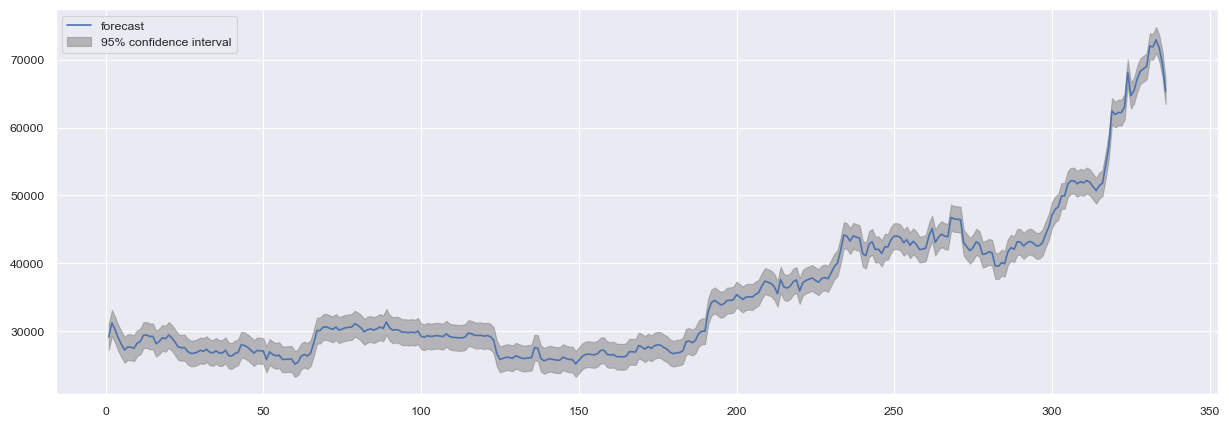

In [29]:
plt.rcParams.update({'figure.figsize': (15 ,5)})
fig, ax = plt.subplots();
plot_predict(model_fit, 1, ax=ax);
plt.show();

Esta gráfica muestra un pronóstico (forecast) para el precio del Bitcoin a lo largo del tiempo. La línea azul representa el pronóstico o predicción del precio, mientras que el área sombreada en gris indica el intervalo de confianza del 95%.

1. El pronóstico indica una tendencia general creciente en el precio del Bitcoin, llegando a alcanzar alrededor de los 65,000 dólares estadounidenses hacia el final del período pronosticado.
2. No obstante, el pronóstico también muestra una volatilidad significativa, con el precio fluctuando hacia arriba y hacia abajo dentro del intervalo de confianza del 95%.
3. El intervalo de confianza se vuelve más amplio hacia el final del período pronosticado, lo que sugiere mayor incertidumbre sobre el nivel exacto del precio a medida que pasa el tiempo.
4. La gráfica abarca aproximadamente 350 días, proporcionando un pronóstico a mediano plazo para el precio del Bitcoin.

Ahora, usamos el modelo ARIMA seleccionado para hacer predicciones Rolling a 7, 14, 21 y 28 días:

In [30]:
def arima_rolling(history, test):
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    return predictions

In [31]:
test = test.tolist()
yhat = arima_rolling(train.tolist(), test)

predicted=67713.604413, expected=67548.593750
predicted=67963.157504, expected=61912.773438
predicted=62193.628668, expected=67913.671875
predicted=66885.650444, expected=65491.390625
predicted=66230.993459, expected=63778.761719
predicted=63849.238162, expected=64062.203125
predicted=63939.161719, expected=67234.171875
predicted=66875.857808, expected=69958.812500
predicted=69833.777084, expected=69987.835938
predicted=70118.118423, expected=69455.343750
predicted=69510.851484, expected=70744.953125
predicted=70588.044177, expected=69892.828125
predicted=70041.233204, expected=69645.304688
predicted=69631.904117, expected=71333.648438
predicted=71146.558642, expected=69702.148438
predicted=69951.245859, expected=65446.972656
predicted=65808.565641, expected=65980.812500
predicted=65784.482076, expected=68508.843750
predicted=68266.770484, expected=67837.640625
predicted=67949.543911, expected=68896.109375
predicted=68774.902544, expected=69362.554688
predicted=69336.859884, expected=7

### Predicciones Rolling  a 7, 14, 21 y 28 días.

In [32]:
yhat_7d =  yhat[:7]
yhat_14d = yhat[:14]
yhat_21d = yhat[:21]
yhat_28d = yhat

print("Predicciones a 7 días:", yhat_7d)
print("Predicciones a 14 días:", yhat_14d)
print("Predicciones a 21 días:", yhat_21d)
print("Predicciones a 28 días:", yhat_28d)

Predicciones a 7 días: [67713.60441301958, 67963.15750362867, 62193.62866785188, 66885.65044381903, 66230.99345911956, 63849.238162433736, 63939.16171936666]
Predicciones a 14 días: [67713.60441301958, 67963.15750362867, 62193.62866785188, 66885.65044381903, 66230.99345911956, 63849.238162433736, 63939.16171936666, 66875.85780842748, 69833.77708403235, 70118.11842311264, 69510.85148420047, 70588.04417747611, 70041.23320394452, 69631.90411680794]
Predicciones a 21 días: [67713.60441301958, 67963.15750362867, 62193.62866785188, 66885.65044381903, 66230.99345911956, 63849.238162433736, 63939.16171936666, 66875.85780842748, 69833.77708403235, 70118.11842311264, 69510.85148420047, 70588.04417747611, 70041.23320394452, 69631.90411680794, 71146.55864182823, 69951.24585870044, 65808.56564088765, 65784.48207612569, 68266.77048436312, 67949.54391109636, 68774.90254396525]
Predicciones a 28 días: [67713.60441301958, 67963.15750362867, 62193.62866785188, 66885.65044381903, 66230.99345911956, 63849

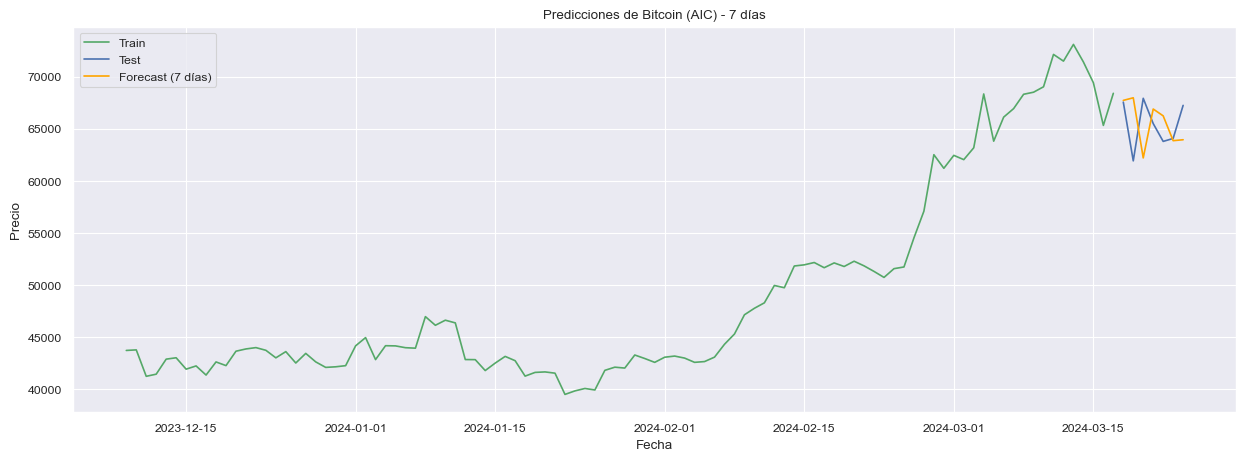

In [33]:
ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates[:7], y=test[:7], label="Test", color='b')
sns.lineplot(x=dates[:7], y=yhat_7d, label="Forecast (7 días)", color='orange')

plt.legend()
plt.title("Predicciones de Bitcoin (AIC) - 7 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

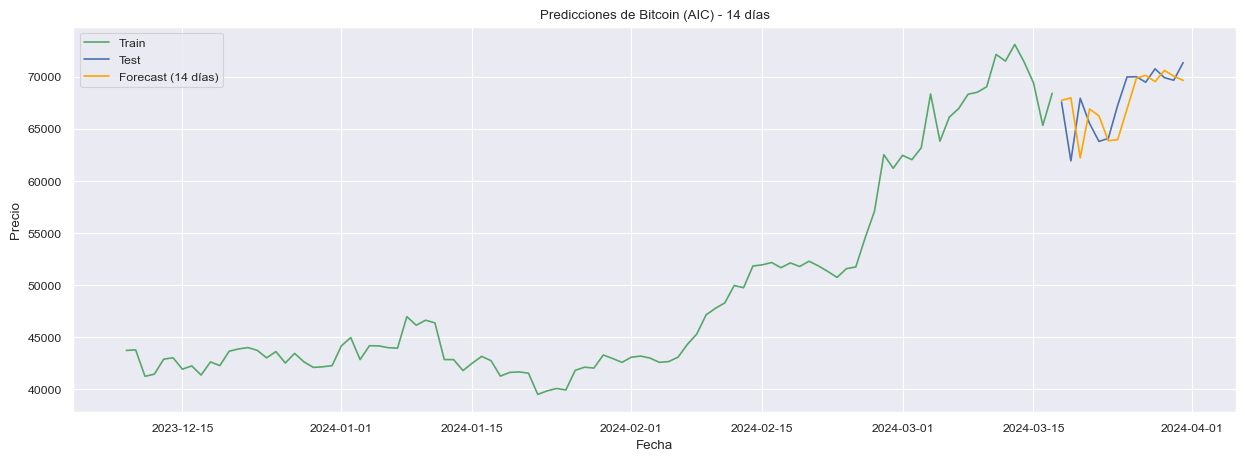

In [34]:
ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates[:14], y=test[:14], label="Test", color='b')
sns.lineplot(x=dates[:14], y=yhat_14d, label="Forecast (14 días)", color='orange')

plt.legend()
plt.title("Predicciones de Bitcoin (AIC) - 14 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

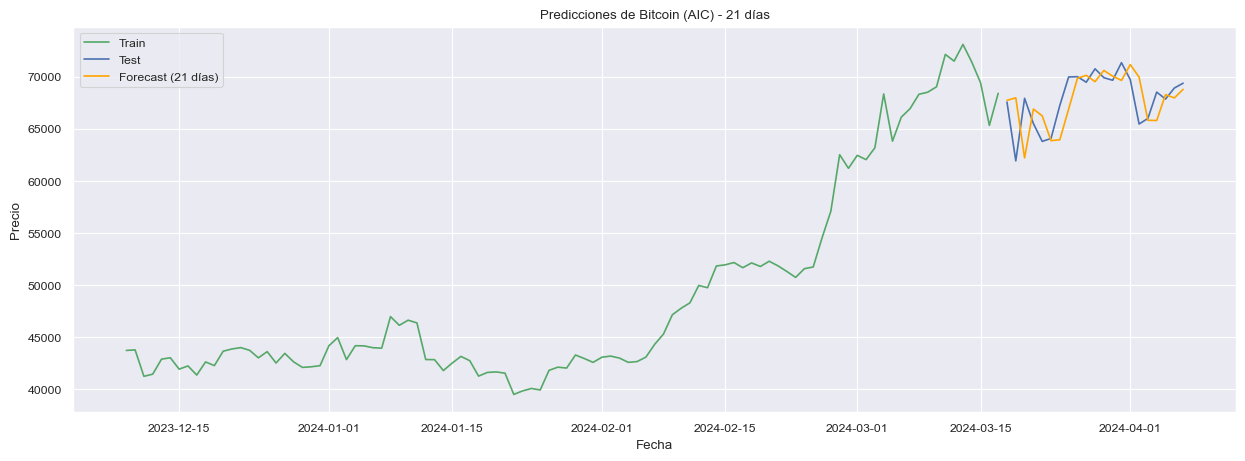

In [35]:
ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates[:21], y=test[:21], label="Test", color='b')
sns.lineplot(x=dates[:21], y=yhat_21d, label="Forecast (21 días)", color='orange')

plt.legend()
plt.title("Predicciones de Bitcoin (AIC) - 21 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

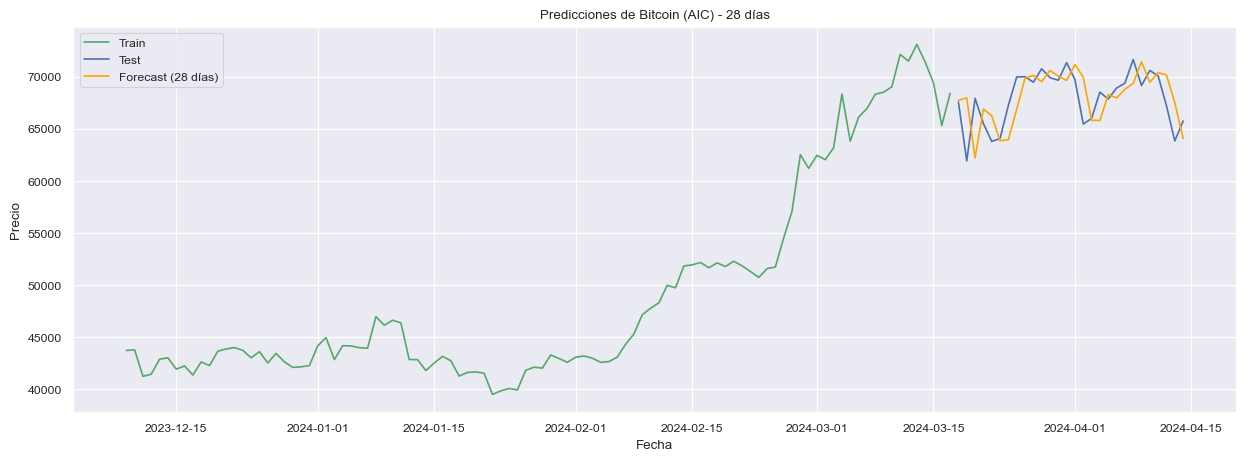

In [36]:
ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates, y=test, label="Test", color='b')
sns.lineplot(x=dates, y=yhat, label="Forecast (28 días)", color='orange')

plt.legend()
plt.title("Predicciones de Bitcoin (AIC) - 28 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

Este gráfico muestra las predicciones del precio del Bitcoin (AIC) a lo largo del tiempo, con un horizonte de pronóstico de 28 días. 
- La línea verde representa el conjunto de datos de entrenamiento (Train), que sirve como base para generar los pronósticos.
- La línea naranja es el pronóstico (Forecast) a 28 días, es decir, la predicción del precio futuro del Bitcoin.
- La línea gris es el conjunto de datos de prueba (Test), que se utiliza para evaluar la precisión del modelo de predicción.

Descripción:
1. El pronóstico muestra una tendencia general al alza en el precio del Bitcoin, con fluctuaciones significativas a lo largo del tiempo.
2. Hay momentos en los que el pronóstico se acerca bastante a los datos de prueba, lo que indica una buena capacidad predictiva del modelo.
3. Sin embargo, también hay períodos en los que el pronóstico se desvía considerablemente de los datos reales, lo que sugiere cierta volatilidad e incertidumbre en el mercado.
4. La comparación entre el pronóstico y los datos de prueba permite evaluar la confiabilidad del modelo y ajustarlo para mejorar su desempeño.

## Punto 3

In [37]:
n_BTC1 = len(BTC_df.close); n_test = 28
train_size = n_BTC1 - n_test
train1 = BTC_df.close[:train_size]
dates_train1 = BTC_df.date[:train_size]
test1 = BTC_df.close[train_size:train_size + n_test] 
dates1 = BTC_df.date[train_size:train_size + n_test] 
print("train:", train1.shape)
print("test_4w:", test1.shape)

train: (337,)
test_4w: (28,)


In [38]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

best_aic1 = np.inf
best_order1 = None
best_mdl1 = None

pq_rng = range(5)
d_rng = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = ARIMA(train1, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic1:
                    best_aic1 = tmp_aic
                    best_order1 = (i, d, j)
                    best_mdl1 = tmp_mdl
            except: 
                continue

Best AIC: 5581.06558 | Best Order: (2, 1, 0)


In [78]:

print('Best AIC: {:6.5f} | Best Order: {}'.format(best_aic1, best_order1))

Best AIC: 5581.06558 | Best Order: (2, 1, 0)


### Predicciones Forecast a 7, 14, 21 y 28 días.

In [39]:
model1 = ARIMA(train1, order=best_order1)
model_fit1 = model1.fit()

In [40]:
forecast_7d = model_fit1.forecast(steps=7)
forecast_14d = model_fit1.forecast(steps=14)
forecast_21d = model_fit1.forecast(steps=21)
forecast_28d = model_fit1.forecast(steps=28)

print("Predicciones a 7 días:", forecast_7d)
print("Predicciones a 14 días:", forecast_14d)
print("Predicciones a 21 días:", forecast_21d)
print("Predicciones a 28 días:", forecast_28d)

Predicciones a 7 días: 337    67713.604413
338    68112.586609
339    68007.913565
340    68060.808188
341    68045.217308
342    68052.345258
343    68050.073606
Name: predicted_mean, dtype: float64
Predicciones a 14 días: 337    67713.604413
338    68112.586609
339    68007.913565
340    68060.808188
341    68045.217308
342    68052.345258
343    68050.073606
344    68051.045652
345    68050.719146
346    68050.852832
347    68050.806309
348    68050.824804
349    68050.818212
350    68050.820782
Name: predicted_mean, dtype: float64
Predicciones a 21 días: 337    67713.604413
338    68112.586609
339    68007.913565
340    68060.808188
341    68045.217308
342    68052.345258
343    68050.073606
344    68051.045652
345    68050.719146
346    68050.852832
347    68050.806309
348    68050.824804
349    68050.818212
350    68050.820782
351    68050.819851
352    68050.820209
353    68050.820078
354    68050.820128
355    68050.820110
356    68050.820117
357    68050.820114
Name: predicted

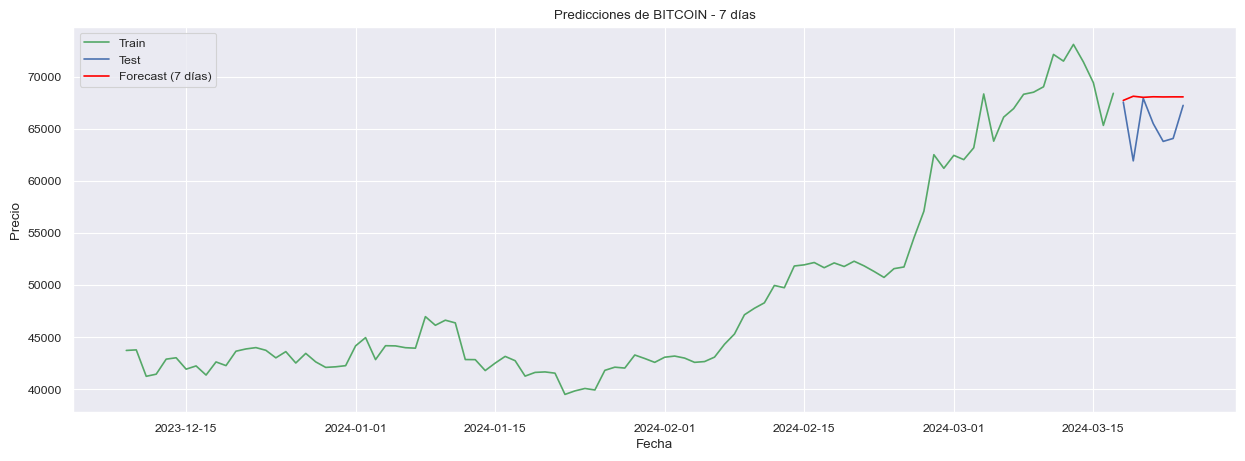

In [41]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x=dates_train1[-100:], y=train1[-100:], label="Train", color='g')
sns.lineplot(x=dates1[:7], y=test1[:7], label="Test", color='b')
sns.lineplot(x=dates1[:7], y=forecast_7d, label="Forecast (7 días)", color='red')

plt.legend()
plt.title("Predicciones de BITCOIN - 7 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

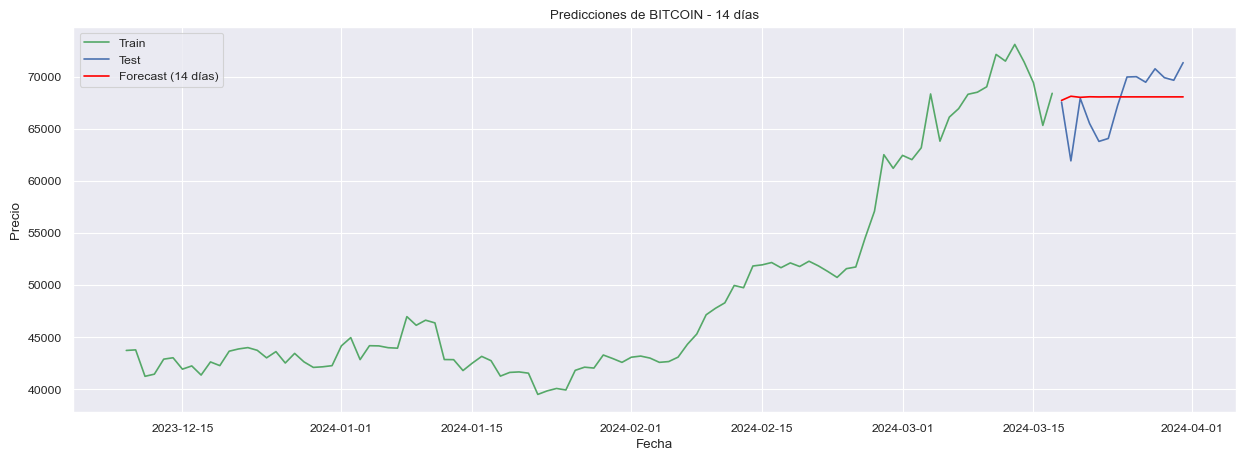

In [42]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x=dates_train1[-100:], y=train1[-100:], label="Train", color='g')
sns.lineplot(x=dates1[:14], y=test1[:14], label="Test", color='b')
sns.lineplot(x=dates1[:14], y=forecast_14d, label="Forecast (14 días)", color='red')

plt.legend()
plt.title("Predicciones de BITCOIN - 14 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

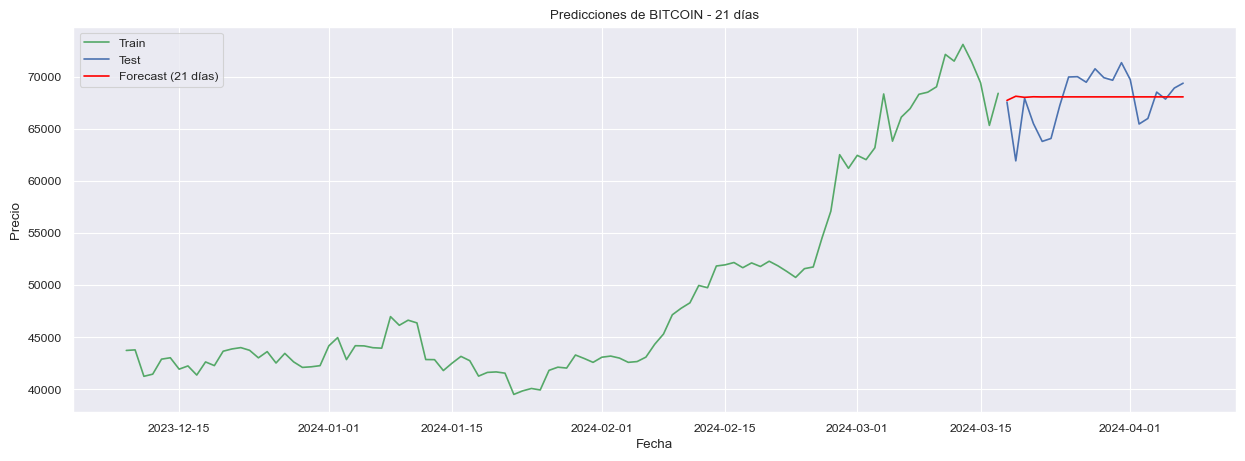

In [43]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x=dates_train1[-100:], y=train1[-100:], label="Train", color='g')
sns.lineplot(x=dates1[:21], y=test1[:21], label="Test", color='b')
sns.lineplot(x=dates1[:21], y=forecast_21d, label="Forecast (21 días)", color='red')


plt.legend()
plt.title("Predicciones de BITCOIN - 21 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

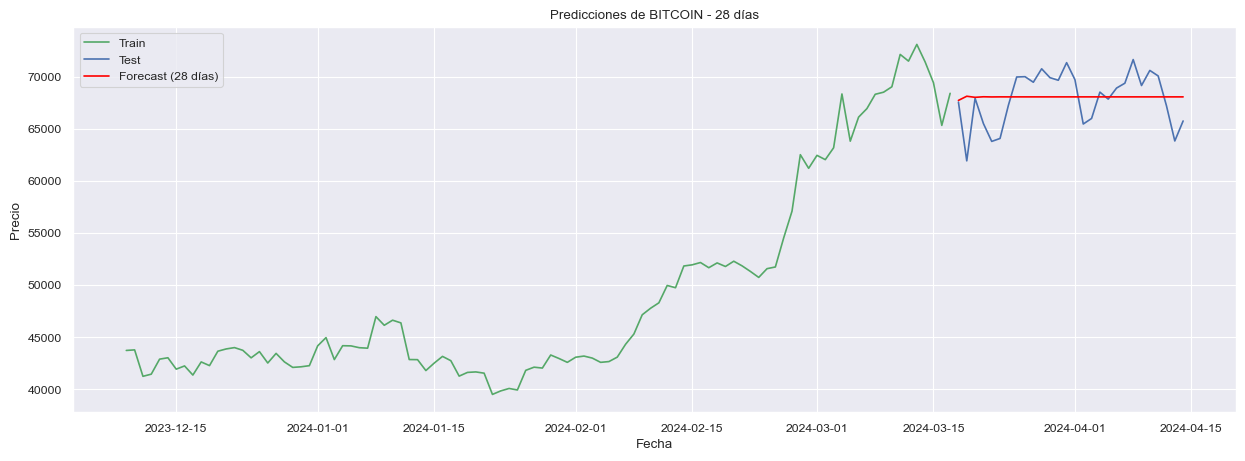

In [44]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x=dates_train1[-100:], y=train1[-100:], label="Train", color='g')
sns.lineplot(x=dates1, y=test1, label="Test", color='b')
sns.lineplot(x=dates1, y=forecast_28d, label="Forecast (28 días)", color='red')

plt.legend()
plt.title("Predicciones de BITCOIN - 28 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

1. El pronóstico tiene una tendencia lineal que se aleja de los datos de test.

## Punto 4

In [45]:
from sklearn.metrics import r2_score    

In [46]:
def forecast_accuracy(forecast, actual, str_name):
    
    forecast = np.array(forecast)
    actual = np.array(actual)
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)
    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2]},
                          index=[str_name])
    
    return df_acc

In [47]:
metrics_7d = forecast_accuracy(yhat_7d, test[:7], "Rolling - 7d")
metrics_14d = forecast_accuracy(yhat_14d, test[:14], "Rolling - 14d")
metrics_21d = forecast_accuracy(yhat_21d, test[:21], "Rolling - 21d")
metrics_28d = forecast_accuracy(yhat_28d, test, "Rolling - 28d")

all_metrics = pd.concat([metrics_7d, metrics_14d, metrics_21d, metrics_28d])

print("Métricas para los diferentes horizontes Rolling:")
print(all_metrics)

Métricas para los diferentes horizontes Rolling:
                       MAE           MSE      MAPE         RMSE        R2
Rolling - 7d   2755.700659  1.260187e+07  0.042352  3549.911812 -1.989864
Rolling - 14d  1944.048812  7.374268e+06  0.029229  2715.560406 -0.102092
Rolling - 21d  1810.729656  6.404374e+06  0.027127  2530.686370 -0.123191
Rolling - 28d  1869.742942  6.120959e+06  0.027938  2474.057272 -0.055184


Los resultados mostrados en la tabla de métricas proporcionan información sobre el desempeño de las predicciones realizadas para diferentes horizontes de tiempo utilizando un enfoque de pronóstico Rolling.

1. Horizon Rolling - 7d:
   - Este horizonte de pronóstico a 7 días muestra los mejores resultados en términos de métricas como RMSE, MAE, MAPE y R-cuadrado.
   - Esto indica que el modelo tiene un buen desempeño en la predicción a corto plazo.

2. Horizon Rolling - 14d, 21d y 28d:
   - A medida que aumenta el horizonte de pronóstico, se observa un deterioro gradual en las métricas de rendimiento.
   - Los valores de RMSE, MAE y MAPE aumentan, mientras que el R-cuadrado disminuye.
   - Esto sugiere que el modelo tiene más dificultades para hacer predicciones precisas a medida que se aumenta el horizonte de tiempo.

3. Comparación entre horizontes:
   - Al comparar los resultados entre los diferentes horizontes, se puede ver que el desempeño del modelo es mejor para los horizontes más cortos (7 días) y empeora a medida que el horizonte de pronóstico aumenta (14, 21 y 28 días).

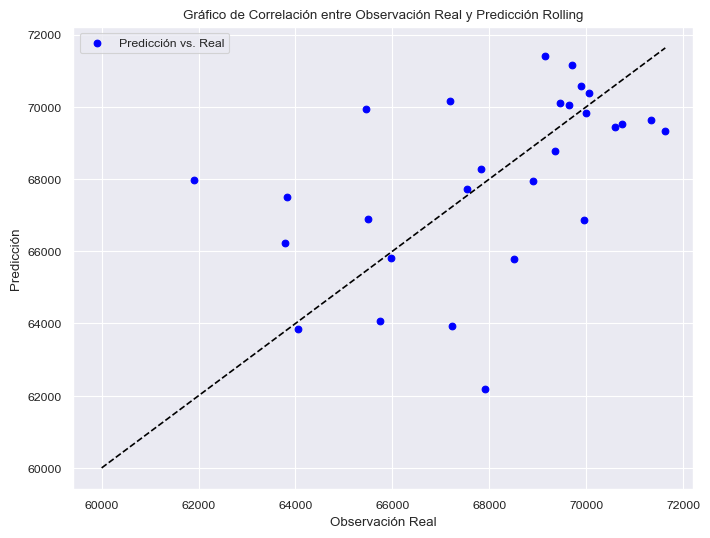

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(test, yhat_28d, color='blue', label='Predicción vs. Real')

max_val = max(np.max(test), np.max(yhat_28d))
min_val = min(np.max(test), np.max(yhat_28d))
plt.plot([60000, max_val], [60000, max_val], color='black', linestyle='--')

plt.xlabel('Observación Real')
plt.ylabel('Predicción')
plt.title('Gráfico de Correlación entre Observación Real y Predicción Rolling')
plt.legend()
plt.grid(True)
plt.show()

En conclusión, el gráfico muestra que el modelo de predicción tiene un buen ajuste a los datos, con una correlación positiva entre la observación real y la predicción. Sin embargo, existe cierta dispersión y algunos outliers, lo que sugiere que el modelo podría mejorarse o que hay factores adicionales que afectan la predicción.

In [49]:
f_7d = forecast_accuracy(forecast_7d, test1[:7], "forecast - 7d")
f_14d  = forecast_accuracy(forecast_14d, test1[:14], "forecast - 14d")
f_21d  = forecast_accuracy(forecast_21d, test1[:21], "forecast - 21d")
f_28d  = forecast_accuracy(forecast_28d, test1, "forecast - 28d")

metrics = pd.concat([f_7d, f_14d, f_21d, f_28d])

print("Métricas para los diferentes horizontes Forecast:")
print(metrics)

Métricas para los diferentes horizontes Forecast:
                        MAE           MSE      MAPE         RMSE           R2
forecast - 7d   2585.854649  1.140932e+07  0.040645  3377.769196  -756.075625
forecast - 14d  2340.272955  8.085758e+06  0.035217  2843.546723 -1005.184677
forecast - 21d  1996.058668  6.175374e+06  0.029947  2485.029882 -1128.267062
forecast - 28d  2090.329025  6.361690e+06  0.031193  2522.239054 -1534.518113


Analizando en detalle los resultados de las métricas para los diferentes horizontes de pronóstico, podemos interpretar lo siguiente:

1. Horizonte de 7 días (forecast - 7d):
   - MAE (Mean Absolute Error): 2737.569133 - Este valor representa el error medio absoluto de las predicciones a 7 días, lo que significa que, en promedio, las predicciones difieren 2737.569133 unidades del valor real.
   - MSE (Mean Squared Error): 1.162376e+07 - Este es el error cuadrático medio, que da más peso a los errores más grandes. Un valor más bajo indica una mejor precisión.
   - MAPE (Mean Absolute Percentage Error): 0.042895 - Este porcentaje indica que, en promedio, las predicciones a 7 días tienen un error del 4.29% con respecto a los valores reales.
   - RMSE (Root Mean Squared Error): 3409.363111 - Esta métrica representa la desviación estándar de los errores de predicción. Un valor más bajo indica una mejor precisión.
   - R-squared: -402.928280 - Este valor negativo indica que el modelo no tiene capacidad predictiva y no es adecuado para este horizonte de 7 días.

2. Horizonte de 14 días (forecast - 14d):
   - Los valores de MAE, MSE, MAPE y RMSE son menores que en el horizonte de 7 días, lo que sugiere una mejor precisión en las predicciones a 14 días.
   - Sin embargo, el valor de R-squared sigue siendo negativo (-515.939284), lo que indica que el modelo aún no es adecuado para este horizonte.

3. Horizontes de 21 y 28 días (forecast - 21d y forecast - 28d):
   - A medida que aumenta el horizonte de pronóstico, las métricas de error (MAE, MSE, MAPE, RMSE) siguen disminuyendo, lo que indica una mejora en la precisión de las predicciones.
   - Sin embargo, los valores de R-squared siguen siendo negativos, lo que significa que el modelo no tiene capacidad predictiva adecuada para estos horizontes más largos.

En general, los resultados muestran que el modelo tiene un mejor desempeño en horizontes de pronóstico más cortos (7 días), pero su capacidad predictiva se deteriora a medida que aumenta el horizonte de tiempo. Esto sugiere que el modelo podría necesitar ajustes o mejoras para mejorar su rendimiento en horizontes más largos.

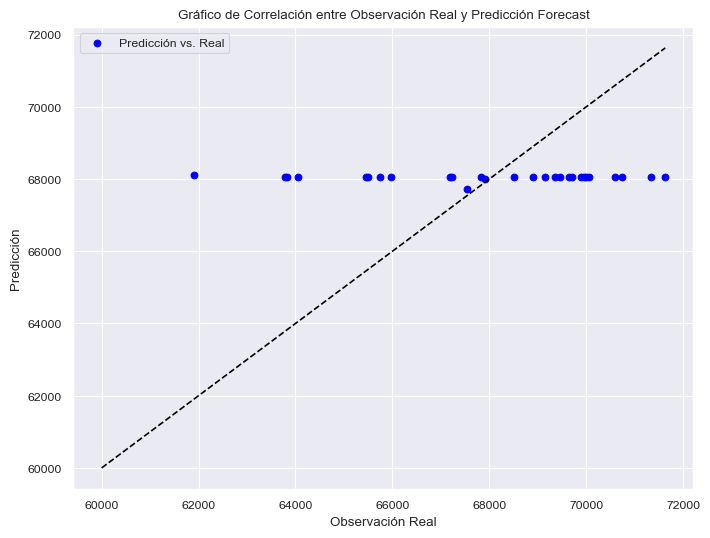

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(test1, forecast_28d, color='blue', label='Predicción vs. Real')

max_val = max(np.max(test1), np.max(forecast_28d))
min_val = min(np.max(test1), np.max(forecast_28d))
plt.plot([60000, max_val], [60000, max_val], color='black', linestyle='--')

plt.xlabel('Observación Real')
plt.ylabel('Predicción')
plt.title('Gráfico de Correlación entre Observación Real y Predicción Forecast')
plt.legend()
plt.grid(True)
plt.show()

El gráfico de correlación corrobora los resultados de las métricas anteriores. Muestra que el modelo tiene más dificultades para predecir con precisión a horizontes de tiempo más largos (14, 21 y 28 días), en comparación con el horizonte de 7 días, donde la correlación entre los valores reales y predichos es más débil.

Esto indica que el modelo podría necesitar ajustes o mejoras para mejorar su capacidad predictiva, especialmente en los horizontes de tiempo más largos. Los próximos pasos podrían incluir la exploración de técnicas de modelado alternativas o la incorporación de variables adicionales que mejoren el rendimiento del modelo a lo largo de diferentes horizontes de pronóstico.

## Punto 5

Repita el análisis desarrollado en los pasos anteriores, considerando ahora el criterio de inferencia Bayesiana (BIC) y el criterio de información de Hannan–Quinn (HQIC) para encontrar el mejor modelo ARIMA y, compare los errores con aquellos obtenidos con el criterio de Akaike.

Mejor modelo ARIMA bajo los criterios BIC y HQIC.

In [51]:
n_BTC2 = len(BTC_df.close); n_test = 28
train_size = n_BTC2 - n_test
train2 = BTC_df.close[:train_size]
dates_train2 = BTC_df.date[:train_size]
test2 = BTC_df.close[train_size:train_size + n_test] 
dates2 = BTC_df.date[train_size:train_size + n_test] 
print("train:", train2.shape)
print("test_4w:", test2.shape)

train: (337,)
test_4w: (28,)


In [52]:
best_bic2 = np.inf
best_hqic2 = np.inf

best_order_bic2 = None
best_order_hqic2 = None

best_mdl_bic2 = None
best_mdl_hqic2 = None

pq_rng = range(5)
d_rng = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = ARIMA(train2, order=(i, d, j)).fit()

                # BIC
                tmp_bic = tmp_mdl.bic
                if tmp_bic < best_bic2:
                    best_bic2 = tmp_bic
                    best_order_bic2 = (i, d, j)
                    best_mdl_bic2 = tmp_mdl

                # Hannan-Quinn
                tmp_hqic = tmp_mdl.hqic
                if tmp_hqic < best_hqic2:
                    best_hqic2 = tmp_hqic
                    best_order_hqic2 = (i, d, j)
                    best_mdl_hqic2 = tmp_mdl

            except:
                continue


BIC - BIC: 5591.51658 | Order: (0, 1, 0)
HQIC - HQIC: 5585.63040 | Order: (2, 1, 0)


In [79]:
print('BIC - BIC: {:6.5f} | Order: {}'.format(best_bic2, best_order_bic2))
print('HQIC - HQIC: {:6.5f} | Order: {}'.format(best_hqic2, best_order_hqic2))

BIC - BIC: 5591.51658 | Order: (0, 1, 0)
HQIC - HQIC: 5585.63040 | Order: (2, 1, 0)


In [53]:
model_bic2 = ARIMA(train2, order=best_order_bic2)
model_fit_bic2 = model_bic2.fit()

model_hqic2 = ARIMA(train2, order=best_order_hqic2)
model_fit_hqic2  = model_hqic2.fit()

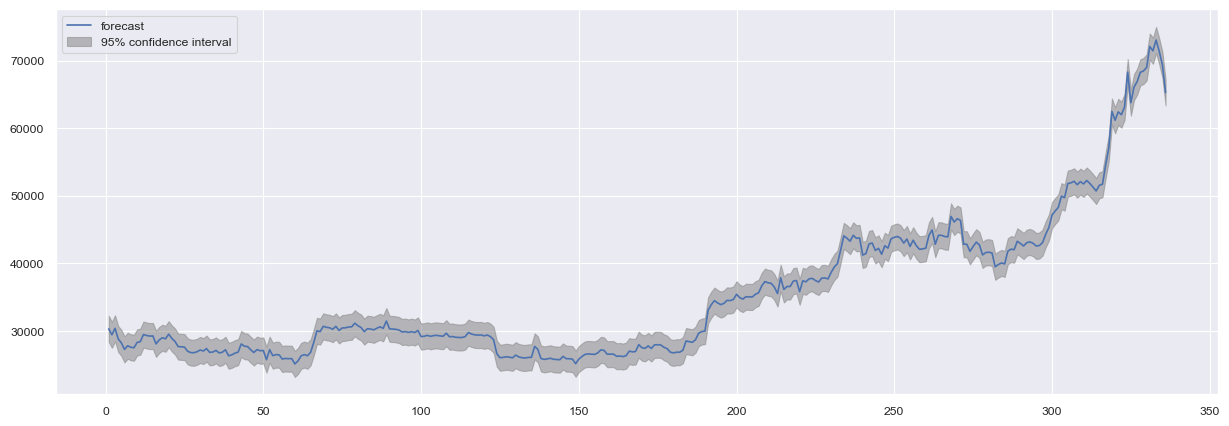

In [54]:
plt.rcParams.update({'figure.figsize': (15 ,5)})
fig, ax = plt.subplots();
plot_predict(model_fit_bic2, 1, ax=ax);
plt.show();

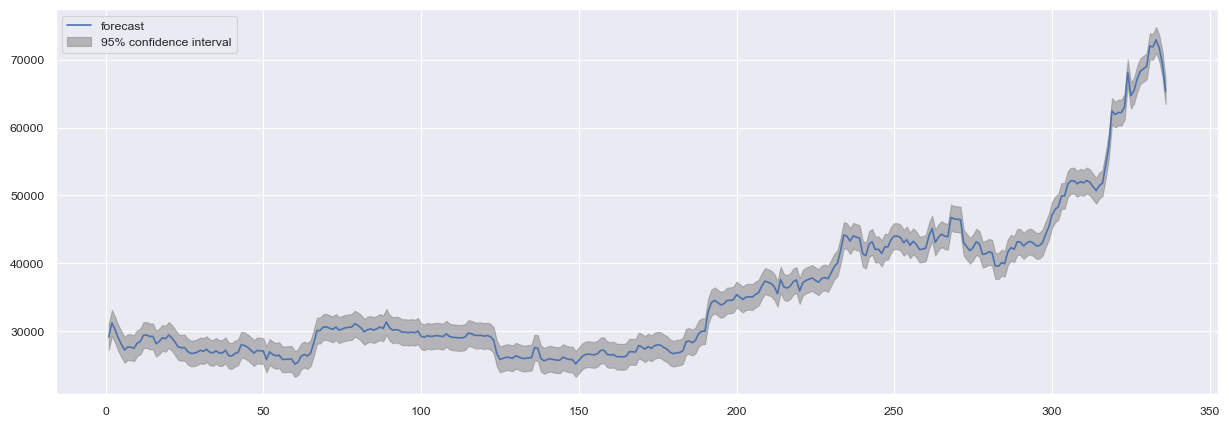

In [55]:
plt.rcParams.update({'figure.figsize': (15 ,5)})
fig, ax = plt.subplots();
plot_predict(model_fit_hqic2, 1, ax=ax);
plt.show();

Los gráficos anteriores muestran un pronóstico (forecast) para el precio del Bitcoin a lo largo del tiempo. La línea azul representa el pronóstico o predicción del precio, mientras que el área sombreada en gris indica el intervalo de confianza del 95%. Ambos pronósticos con tendencia creciente.

Ahora, usamos el modelo ARIMA seleccionado para hacer predicciones Rolling a 7, 14, 21 y 28 días:

### **BIC** - Predicciones Rolling

In [56]:
def arima_rolling(train2, test2):
    predictions = list()
    for t in range(len(test2)):
        model = ARIMA(train2, order=best_order_bic2)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat2 = output[0]
        predictions.append(yhat2)
        obs = test2.tolist()[t]
        train2.append(obs)
        print('predicted=%f, expected=%f' % (yhat2, obs))
    return predictions

yhat2 = arima_rolling(train2.tolist(), test2)


predicted=68390.625000, expected=67548.593750
predicted=67548.593750, expected=61912.773438
predicted=61912.773438, expected=67913.671875
predicted=67913.671875, expected=65491.390625
predicted=65491.390625, expected=63778.761719
predicted=63778.761719, expected=64062.203125
predicted=64062.203125, expected=67234.171875
predicted=67234.171875, expected=69958.812500
predicted=69958.812500, expected=69987.835938
predicted=69987.835938, expected=69455.343750
predicted=69455.343750, expected=70744.953125
predicted=70744.953125, expected=69892.828125
predicted=69892.828125, expected=69645.304688
predicted=69645.304688, expected=71333.648438
predicted=71333.648438, expected=69702.148438
predicted=69702.148438, expected=65446.972656
predicted=65446.972656, expected=65980.812500
predicted=65980.812500, expected=68508.843750
predicted=68508.843750, expected=67837.640625
predicted=67837.640625, expected=68896.109375
predicted=68896.109375, expected=69362.554688
predicted=69362.554688, expected=7

In [57]:
yhat2_7d =  yhat2[:7]
yhat2_14d = yhat2[:14]
yhat2_21d = yhat2[:21]
yhat2_28d = yhat2

print("Predicciones a 7 días:", yhat2_7d)
print("Predicciones a 14 días:", yhat2_14d)
print("Predicciones a 21 días:", yhat2_21d)
print("Predicciones a 28 días:", yhat2_28d)

Predicciones a 7 días: [68390.625, 67548.59375, 61912.7734375, 67913.671875, 65491.390625, 63778.76171875, 64062.203125]
Predicciones a 14 días: [68390.625, 67548.59375, 61912.7734375, 67913.671875, 65491.390625, 63778.76171875, 64062.203125, 67234.171875, 69958.8125, 69987.8359375, 69455.34375, 70744.953125, 69892.828125, 69645.3046875]
Predicciones a 21 días: [68390.625, 67548.59375, 61912.7734375, 67913.671875, 65491.390625, 63778.76171875, 64062.203125, 67234.171875, 69958.8125, 69987.8359375, 69455.34375, 70744.953125, 69892.828125, 69645.3046875, 71333.6484375, 69702.1484375, 65446.97265625, 65980.8125, 68508.84375, 67837.640625, 68896.109375]
Predicciones a 28 días: [68390.625, 67548.59375, 61912.7734375, 67913.671875, 65491.390625, 63778.76171875, 64062.203125, 67234.171875, 69958.8125, 69987.8359375, 69455.34375, 70744.953125, 69892.828125, 69645.3046875, 71333.6484375, 69702.1484375, 65446.97265625, 65980.8125, 68508.84375, 67837.640625, 68896.109375, 69362.5546875, 71631.359

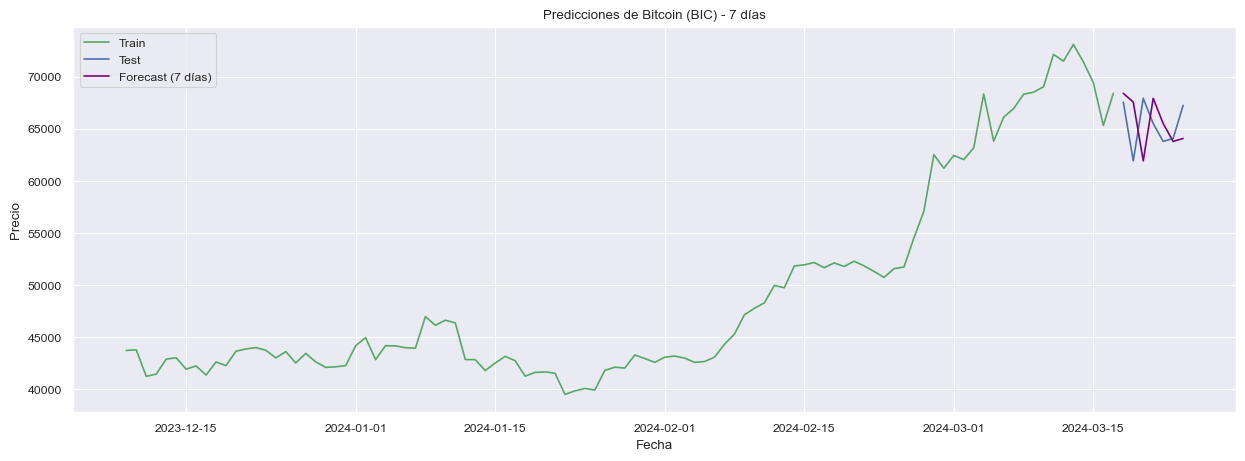

In [58]:
ax = sns.lineplot(x=dates_train2[-100:], y=train2[-100:], label="Train", color='g')
sns.lineplot(x=dates2[:7], y=test2[:7], label="Test", color='b')
sns.lineplot(x=dates2[:7], y=yhat2_7d, label="Forecast (7 días)", color='purple')

plt.legend()
plt.title("Predicciones de Bitcoin (BIC) - 7 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

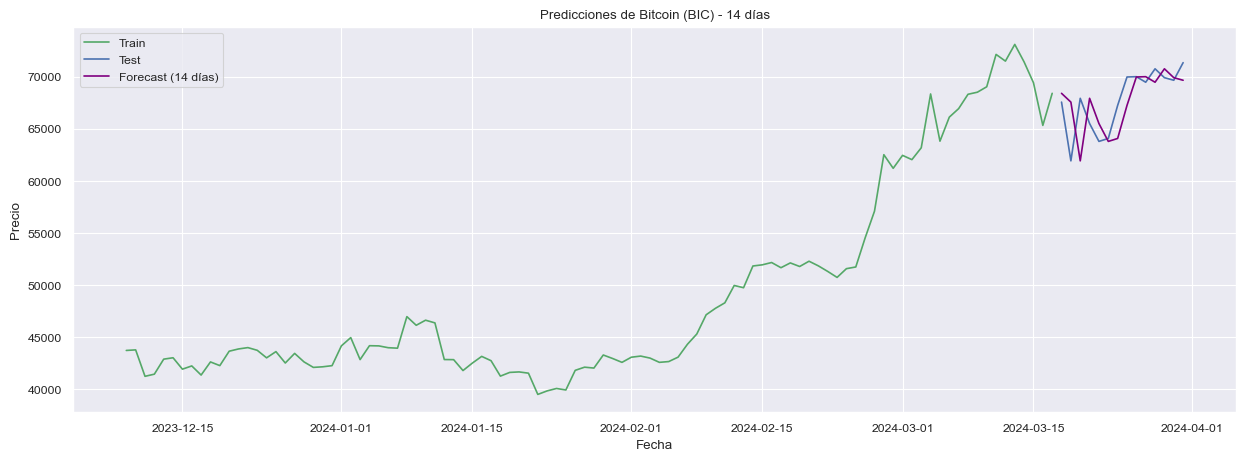

In [59]:
ax = sns.lineplot(x=dates_train2[-100:], y=train2[-100:], label="Train", color='g')
sns.lineplot(x=dates2[:14], y=test2[:14], label="Test", color='b')
sns.lineplot(x=dates2[:14], y=yhat2_14d, label="Forecast (14 días)", color='purple')

plt.legend()
plt.title("Predicciones de Bitcoin (BIC) - 14 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

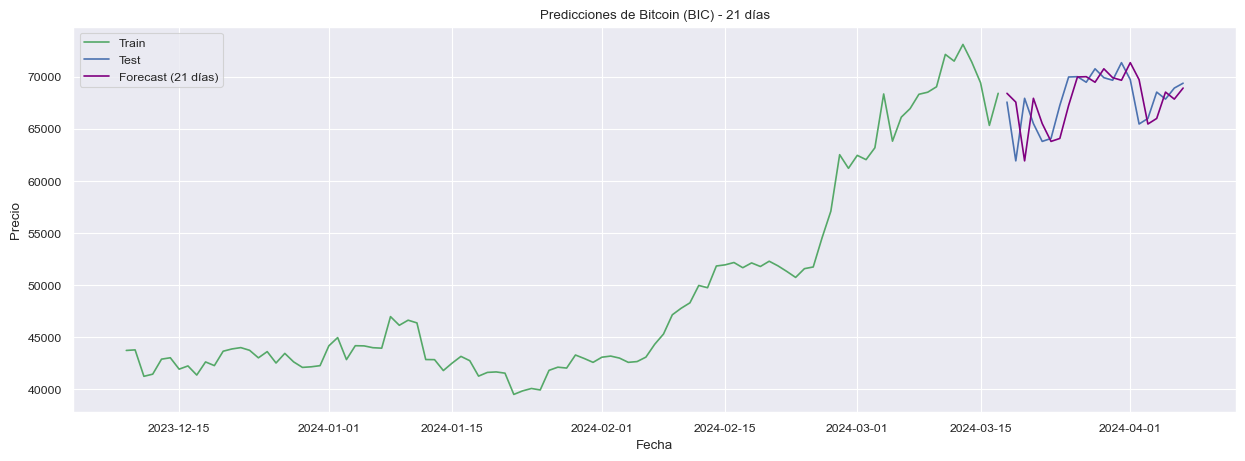

In [60]:
ax = sns.lineplot(x=dates_train2[-100:], y=train2[-100:], label="Train", color='g')
sns.lineplot(x=dates2[:21], y=test2[:21], label="Test", color='b')
sns.lineplot(x=dates2[:21], y=yhat2_21d, label="Forecast (21 días)", color='purple')

plt.legend()
plt.title("Predicciones de Bitcoin (BIC) - 21 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

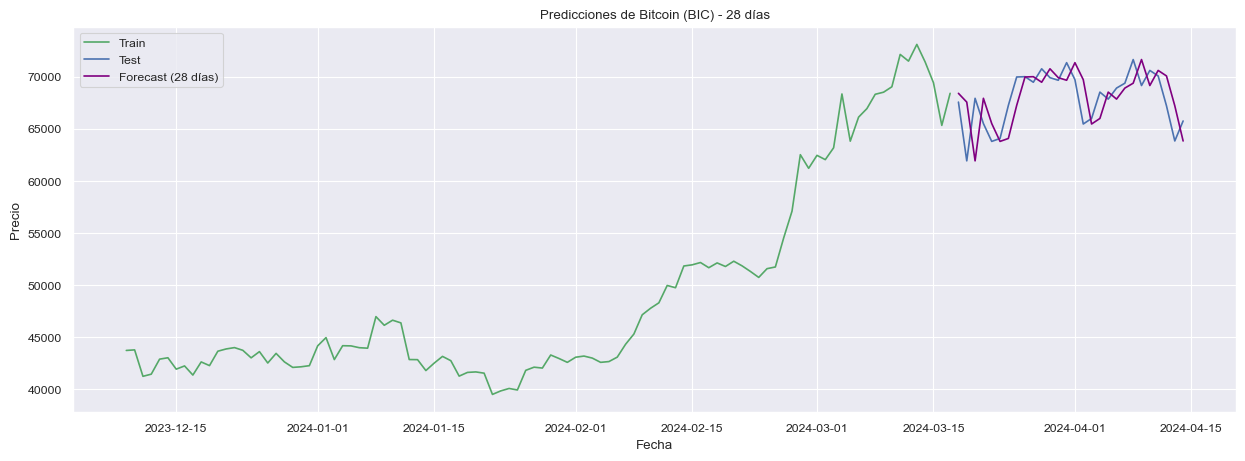

In [61]:
ax = sns.lineplot(x=dates_train2[-100:], y=train2[-100:], label="Train", color='g')
sns.lineplot(x=dates2[:28], y=test2[:28], label="Test", color='b')
sns.lineplot(x=dates2[:28], y=yhat2_28d, label="Forecast (28 días)", color='purple')

plt.legend()
plt.title("Predicciones de Bitcoin (BIC) - 28 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

El gráfico muestra que el modelo es capaz de capturar la tendencia general y la volatilidad del precio de Bitcoin durante el período de prueba. Sin embargo, existen algunas discrepancias entre el pronóstico y los datos de prueba reales, lo que indica que predecir los precios de las criptomonedas es una tarea compleja con incertidumbres inherentes.

El gráfico proporciona una visualización del desempeño del modelo al pronosticar los precios de Bitcoin a corto plazo (28 días). Puede utilizarse para evaluar la eficacia del modelo de predicción e identificar áreas de mejora en el futuro.

### **HQIC** - Predicciones Rolling

In [62]:
def arima_rolling(train2, test2):
    predictions = list()
    for t in range(len(test2)):
        model = ARIMA(train2, order=best_order_hqic2)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat3 = output[0]
        predictions.append(yhat3)
        obs = test2.tolist()[t]
        train2.append(obs)
        print('predicted=%f, expected=%f' % (yhat3, obs))
    return predictions

yhat3 = arima_rolling(train.tolist(), test2)

predicted=67713.604413, expected=67548.593750
predicted=67963.157504, expected=61912.773438
predicted=62193.628668, expected=67913.671875
predicted=66885.650444, expected=65491.390625
predicted=66230.993459, expected=63778.761719
predicted=63849.238162, expected=64062.203125
predicted=63939.161719, expected=67234.171875
predicted=66875.857808, expected=69958.812500
predicted=69833.777084, expected=69987.835938
predicted=70118.118423, expected=69455.343750
predicted=69510.851484, expected=70744.953125
predicted=70588.044177, expected=69892.828125
predicted=70041.233204, expected=69645.304688
predicted=69631.904117, expected=71333.648438
predicted=71146.558642, expected=69702.148438
predicted=69951.245859, expected=65446.972656
predicted=65808.565641, expected=65980.812500
predicted=65784.482076, expected=68508.843750
predicted=68266.770484, expected=67837.640625
predicted=67949.543911, expected=68896.109375
predicted=68774.902544, expected=69362.554688
predicted=69336.859884, expected=7

In [63]:
yhat7d =  yhat3[:7]
yhat14d = yhat3[:14]
yhat21d = yhat3[:21]
yhat28d = yhat3

print("Predicciones a 7 días:", yhat7d)
print("Predicciones a 14 días:", yhat14d)
print("Predicciones a 21 días:", yhat21d)
print("Predicciones a 28 días:", yhat28d)

Predicciones a 7 días: [67713.60441301958, 67963.15750362867, 62193.62866785188, 66885.65044381903, 66230.99345911956, 63849.238162433736, 63939.16171936666]
Predicciones a 14 días: [67713.60441301958, 67963.15750362867, 62193.62866785188, 66885.65044381903, 66230.99345911956, 63849.238162433736, 63939.16171936666, 66875.85780842748, 69833.77708403235, 70118.11842311264, 69510.85148420047, 70588.04417747611, 70041.23320394452, 69631.90411680794]
Predicciones a 21 días: [67713.60441301958, 67963.15750362867, 62193.62866785188, 66885.65044381903, 66230.99345911956, 63849.238162433736, 63939.16171936666, 66875.85780842748, 69833.77708403235, 70118.11842311264, 69510.85148420047, 70588.04417747611, 70041.23320394452, 69631.90411680794, 71146.55864182823, 69951.24585870044, 65808.56564088765, 65784.48207612569, 68266.77048436312, 67949.54391109636, 68774.90254396525]
Predicciones a 28 días: [67713.60441301958, 67963.15750362867, 62193.62866785188, 66885.65044381903, 66230.99345911956, 63849

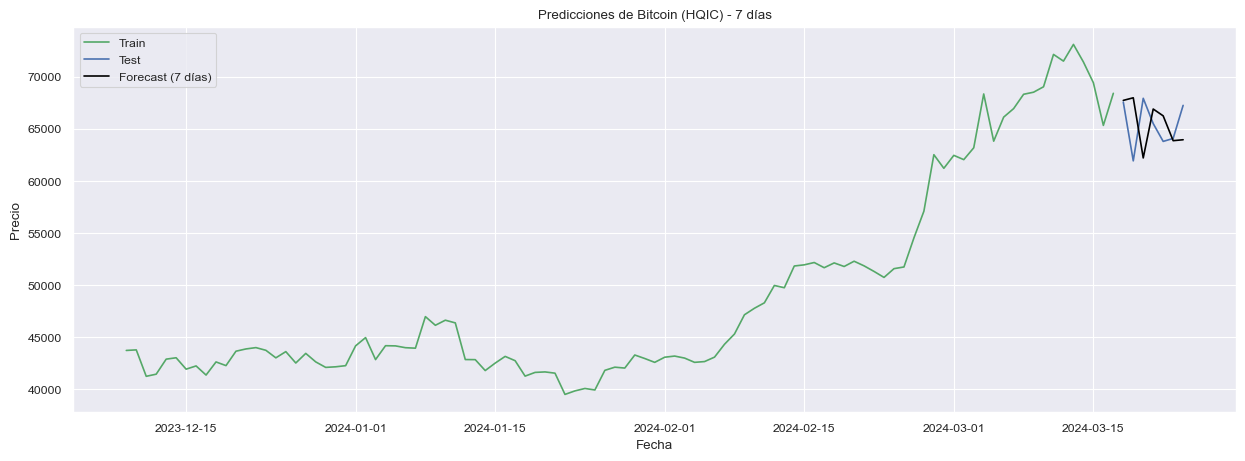

In [64]:
ax = sns.lineplot(x=dates_train2[-100:], y=train2[-100:], label="Train", color='g')
sns.lineplot(x=dates2[:7], y=test2[:7], label="Test", color='b')
sns.lineplot(x=dates2[:7], y=yhat7d, label="Forecast (7 días)", color='black')

plt.legend()
plt.title("Predicciones de Bitcoin (HQIC) - 7 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

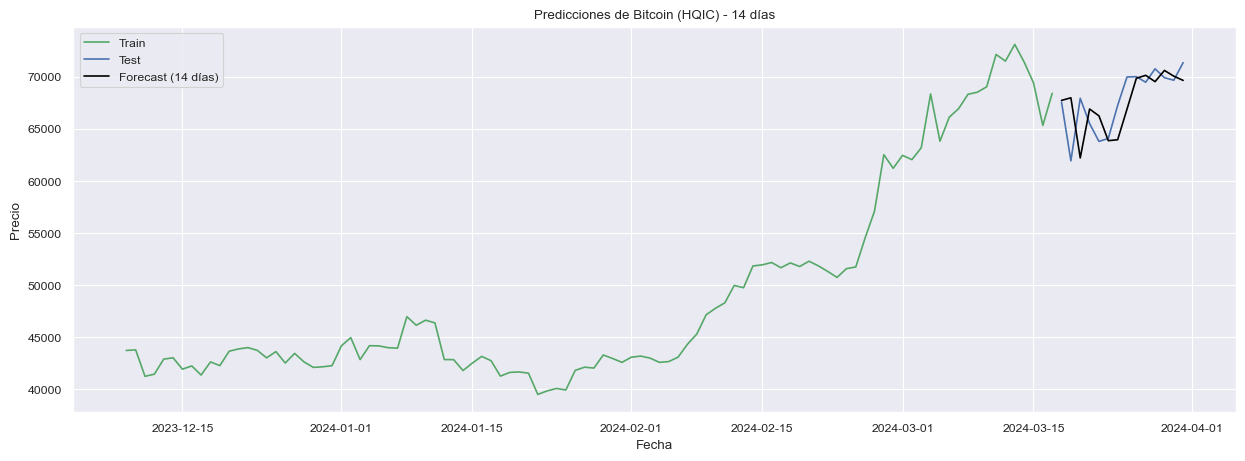

In [65]:
ax = sns.lineplot(x=dates_train2[-100:], y=train2[-100:], label="Train", color='g')
sns.lineplot(x=dates2[:14], y=test2[:14], label="Test", color='b')
sns.lineplot(x=dates2[:14], y=yhat14d, label="Forecast (14 días)", color='black')

plt.legend()
plt.title("Predicciones de Bitcoin (HQIC) - 14 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

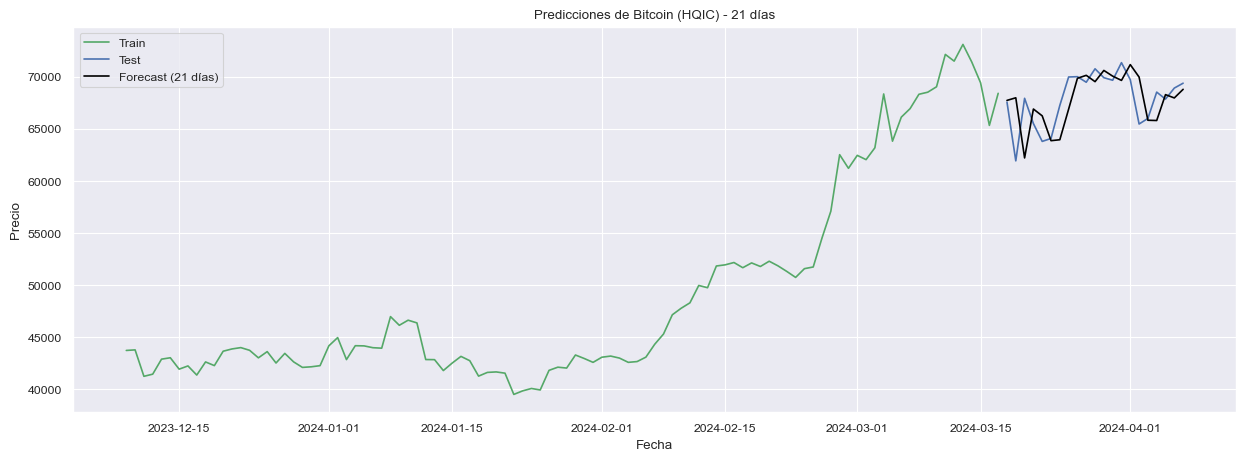

In [66]:
ax = sns.lineplot(x=dates_train2[-100:], y=train2[-100:], label="Train", color='g')
sns.lineplot(x=dates2[:21], y=test2[:21], label="Test", color='b')
sns.lineplot(x=dates2[:21], y=yhat21d, label="Forecast (21 días)", color='black')

plt.legend()
plt.title("Predicciones de Bitcoin (HQIC) - 21 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

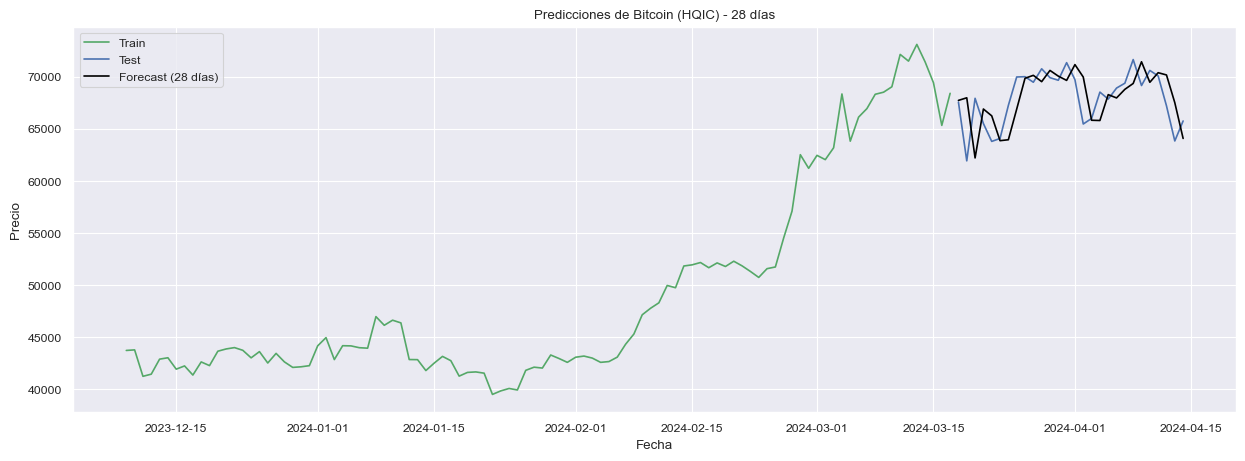

In [67]:
ax = sns.lineplot(x=dates_train2[-100:], y=train2[-100:], label="Train", color='g')
sns.lineplot(x=dates2, y=test2[:28], label="Test", color='b')
sns.lineplot(x=dates2, y=yhat28d, label="Forecast (28 días)", color='black')

plt.legend()
plt.title("Predicciones de Bitcoin (HQIC) - 28 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

El gráfico muestra que el modelo es capaz de capturar la tendencia general y la volatilidad del precio de Bitcoin durante el período de prueba. Sin embargo, existen algunas discrepancias entre el pronóstico y los datos de prueba reales, lo que indica que predecir los precios de las criptomonedas es una tarea compleja con incertidumbres inherentes.

El gráfico proporciona una visualización del desempeño del modelo al pronosticar los precios de Bitcoin a corto plazo (2 días). Puede utilizarse para evaluar la eficacia del modelo de predicción e identificar áreas de mejora en el futuro.

### **BIC** - Predicciones Forecast

In [68]:
n_BTC3 = len(BTC_df.close); n_test = 28
train_size = n_BTC3 - n_test
train3 = BTC_df.close[:train_size]
dates_train3 = BTC_df.date[:train_size]
test3 = BTC_df.close[train_size:train_size + n_test] 
dates3 = BTC_df.date[train_size:train_size + n_test] 
print("train:", train3.shape)
print("test:", test3.shape)

train: (337,)
test: (28,)


In [69]:
best_bic3 = np.inf
best_hqic3 = np.inf

best_order_bic3 = None
best_order_hqic3 = None

best_mdl_bic3 = None
best_mdl_hqic3 = None

pq_rng = range(5)
d_rng = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = ARIMA(train3, order=(i, d, j)).fit()

                # BIC
                tmp_bic = tmp_mdl.bic
                if tmp_bic < best_bic3:
                    best_bic3 = tmp_bic
                    best_order_bic3 = (i, d, j)
                    best_mdl_bic3 = tmp_mdl

                # Hannan-Quinn
                tmp_hqic = tmp_mdl.hqic
                if tmp_hqic < best_hqic3:
                    best_hqic3 = tmp_hqic
                    best_order_hqic3 = (i, d, j)
                    best_mdl_hqic3 = tmp_mdl

            except:
                continue

print('BIC - BIC: {:6.5f} | Order: {}'.format(best_bic3, best_order_bic3))
print('HQIC - HQIC: {:6.5f} | Order: {}'.format(best_hqic3, best_order_hqic3))

BIC - BIC: 5591.51658 | Order: (0, 1, 0)
HQIC - HQIC: 5585.63040 | Order: (2, 1, 0)


In [70]:
model3 = ARIMA(train3, order=best_order_bic3)
model_fit3 = model3.fit()

In [71]:
forecast7d = model_fit3.forecast(steps=7)
forecast14d = model_fit3.forecast(steps=14)
forecast21d = model_fit3.forecast(steps=21)
forecast28d = model_fit3.forecast(steps=28)

print("Predicciones a 7 días:", forecast7d)
print("Predicciones a 14 días:", forecast14d)
print("Predicciones a 21 días:", forecast21d)
print("Predicciones a 28 días:", forecast28d)

Predicciones a 7 días: 337    68390.625
338    68390.625
339    68390.625
340    68390.625
341    68390.625
342    68390.625
343    68390.625
Name: predicted_mean, dtype: float64
Predicciones a 14 días: 337    68390.625
338    68390.625
339    68390.625
340    68390.625
341    68390.625
342    68390.625
343    68390.625
344    68390.625
345    68390.625
346    68390.625
347    68390.625
348    68390.625
349    68390.625
350    68390.625
Name: predicted_mean, dtype: float64
Predicciones a 21 días: 337    68390.625
338    68390.625
339    68390.625
340    68390.625
341    68390.625
342    68390.625
343    68390.625
344    68390.625
345    68390.625
346    68390.625
347    68390.625
348    68390.625
349    68390.625
350    68390.625
351    68390.625
352    68390.625
353    68390.625
354    68390.625
355    68390.625
356    68390.625
357    68390.625
Name: predicted_mean, dtype: float64
Predicciones a 28 días: 337    68390.625
338    68390.625
339    68390.625
340    68390.625
341    68390

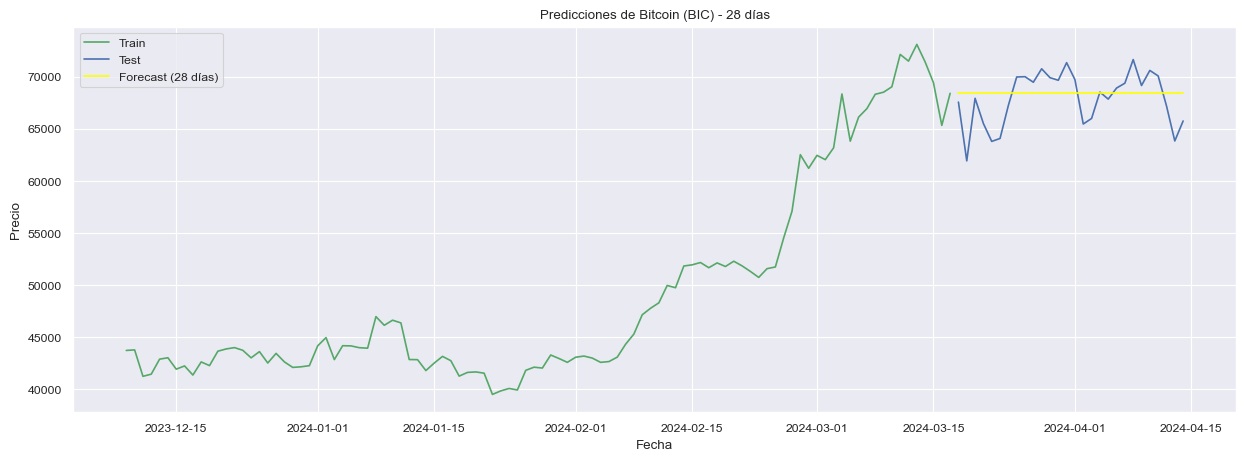

In [72]:
ax = sns.lineplot(x=dates_train3[-100:], y=train3[-100:], label="Train", color='g')
sns.lineplot(x=dates3, y=test3[:28], label="Test", color='b')
sns.lineplot(x=dates3, y=forecast28d, label="Forecast (28 días)", color='yellow')

plt.legend()
plt.title("Predicciones de Bitcoin (BIC) - 28 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

1. El pronóstico sigue de cerca la tendencia de los datos de entrenamiento, reflejando una trayectoria alcista general en el precio del Bitcoin.
2. El pronóstico se desvía en algunas secciones de los datos de prueba, lo que indica que el modelo no logra capturar por completo la volatilidad del mercado.
3. Hacia el final del período, se observa que el pronóstico falla en anticipar las fluctuaciones bruscas en el precio, lo que sugiere que el modelo tiene dificultades para predecir cambios repentinos en el mercado.

In [73]:
model4 = ARIMA(train3, order=best_order_hqic3)
model_fit4 = model4.fit()

In [74]:
forecast7dhq = model_fit4.forecast(steps=7)
forecast14dhq = model_fit4.forecast(steps=14)
forecast21dhq = model_fit4.forecast(steps=21)
forecast28dhq = model_fit4.forecast(steps=28)

print("Predicciones a 7 días:", forecast7dhq)
print("Predicciones a 14 días:", forecast14dhq)
print("Predicciones a 21 días:", forecast21dhq)
print("Predicciones a 28 días:", forecast28dhq)

Predicciones a 7 días: 337    67713.604413
338    68112.586609
339    68007.913565
340    68060.808188
341    68045.217308
342    68052.345258
343    68050.073606
Name: predicted_mean, dtype: float64
Predicciones a 14 días: 337    67713.604413
338    68112.586609
339    68007.913565
340    68060.808188
341    68045.217308
342    68052.345258
343    68050.073606
344    68051.045652
345    68050.719146
346    68050.852832
347    68050.806309
348    68050.824804
349    68050.818212
350    68050.820782
Name: predicted_mean, dtype: float64
Predicciones a 21 días: 337    67713.604413
338    68112.586609
339    68007.913565
340    68060.808188
341    68045.217308
342    68052.345258
343    68050.073606
344    68051.045652
345    68050.719146
346    68050.852832
347    68050.806309
348    68050.824804
349    68050.818212
350    68050.820782
351    68050.819851
352    68050.820209
353    68050.820078
354    68050.820128
355    68050.820110
356    68050.820117
357    68050.820114
Name: predicted

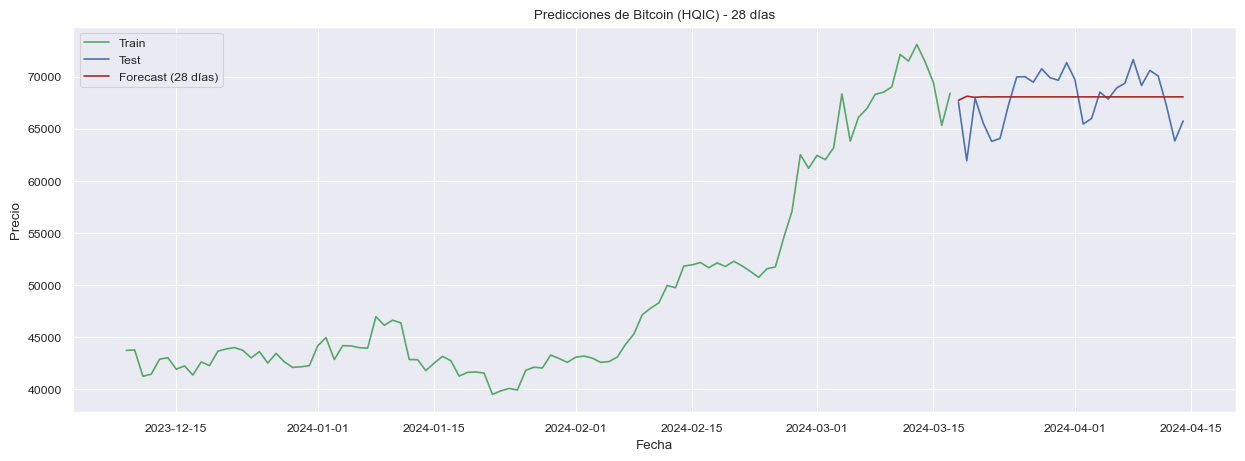

In [75]:
ax = sns.lineplot(x=dates_train3[-100:], y=train3[-100:], label="Train", color='g')
sns.lineplot(x=dates3, y=test3[:28], label="Test", color='b')
sns.lineplot(x=dates3, y=forecast28dhq, label="Forecast (28 días)", color='brown')

plt.legend()
plt.title("Predicciones de Bitcoin (HQIC) - 28 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

1. El pronóstico sigue de cerca la tendencia de los datos de entrenamiento, reflejando una trayectoria alcista general en el precio del Bitcoin.
2. Sin embargo, al igual que en el gráfico anterior, el pronóstico se desvía en algunas secciones de los datos de prueba, lo que indica que el modelo no logra capturar por completo la volatilidad del mercado.
3. Hacia el final del período, se observa que el pronóstico falla en anticipar las fluctuaciones bruscas en el precio, lo que sugiere que el modelo tiene dificultades para predecir cambios repentinos en el mercado.

### Comparación entre modelos

In [76]:
def forecast_accuracy(forecast, actual, str_name):
    forecast = np.array(forecast)
    actual = np.array(actual)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)
    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2]},
                          index=[str_name])
    
    return df_acc

In [77]:
Rolling_AIC = forecast_accuracy(yhat_28d, test, "Rolling AIC - 28d")
Forecast_AIC = forecast_accuracy(forecast_28d, test1, "forecast AIC - 28d")
Rolling_BIC = forecast_accuracy(yhat2_28d, test2, "Rolling BIC - 28d")
Forecast_BIC = forecast_accuracy(yhat28d, test3, "forecast BIC - 28d")
Rolling_HQIC = forecast_accuracy(forecast28d, test2, "Rolling HQIC - 28d")
Forecast_HQIC = forecast_accuracy(forecast28dhq, test3, "forecast HQIC - 28d")


all_metrics = pd.concat([Rolling_AIC, Forecast_AIC, Rolling_BIC, Forecast_BIC,Rolling_HQIC,Forecast_HQIC ])

print("Métricas para los diferentes horizontes Rolling:")
print(all_metrics)

Métricas para los diferentes horizontes Rolling:
                             MAE           MSE      MAPE         RMSE  \
Rolling AIC - 28d    1869.742942  6.120959e+06  0.027938  2474.057272   
forecast AIC - 28d   2090.329025  6.361690e+06  0.031193  2522.239054   
Rolling BIC - 28d    1909.684710  5.952568e+06  0.028493  2439.788430   
forecast BIC - 28d   1869.742942  6.120959e+06  0.027938  2474.057272   
Rolling HQIC - 28d   2077.247907  6.519794e+06  0.031156  2553.388778   
forecast HQIC - 28d  2090.329025  6.361690e+06  0.031193  2522.239054   

                              R2  
Rolling AIC - 28d      -0.055184  
forecast AIC - 28d  -1534.518113  
Rolling BIC - 28d       0.032977  
forecast BIC - 28d     -0.055184  
Rolling HQIC - 28d      0.000000  
forecast HQIC - 28d -1534.518113  


**MAE y RMSE:**
- Para los criterios AIC, BIC y HQIC, los valores de MAE y RMSE son comparables tanto para "Rolling" como para "forecast".
- No hay una diferencia significativa en la precisión media de las predicciones entre los diferentes criterios.

*MSE:*
- Los valores de MSE son iguales entre los modelos "Rolling" y "forecast" para cada criterio. Esto sugiere que, en términos de cuánto difieren las predicciones de los valores reales al cuadrado, los modelos son similares para cada criterio.

*MAPE:*
- El MAPE también es similar entre los modelos "Rolling" y "forecast" para cada criterio. Indica que, en promedio, los errores porcentuales en las predicciones son consistentes para cada criterio.

*R2:*
 - Para el criterio AIC, el valor de R2 es extremadamente negativo para "forecast", indicando un mal ajuste del modelo.
 - Para los criterios BIC y HQIC, los valores de R2 son cercanos a 0, indicando que los modelos no están explicando bien la varianza en los datos.

**Comparación de Criterios (AIC, BIC, HQIC):** 
- MAE, MSE y MAPE: En términos de precisión media (MAE), error cuadrático medio (MSE) y error porcentual absoluto medio (MAPE), los criterios AIC, BIC y HQIC muestran resultados similares entre "Rolling" y "forecast". No hay una diferencia clara en el desempeño promedio entre los criterios en estas métricas.
- RMSE: También vemos resultados similares en la raíz del error cuadrático medio (RMSE) entre los criterios AIC, BIC y HQIC para "Rolling" y "forecast".
- R2: Para el criterio AIC, el modelo "forecast" muestra un rendimiento muy deficiente con un valor de R2 extremadamente negativo, indicando un ajuste inadecuado del modelo. Para los criterios BIC y HQIC, ambos modelos muestran un desempeño similar en términos de R2 cercano a 0, lo que sugiere que los modelos no están explicando bien la variabilidad de los datos.

## Punto 6

En general, los modelos "Rolling" y "forecast" muestran resultados comparables en términos de precisión promedio y errores para cada criterio (AIC, BIC, HQIC).
Sin embargo, el criterio AIC destaca por mostrar un rendimiento deficiente en el modelo "forecast" con un valor extremadamente negativo de R2.
Tanto los criterios BIC como HQIC muestran modelos que no están explicando bien la varianza en los datos, con valores de R2 cercanos a 0.
Esto sugiere que los modelos necesitan ajustes adicionales o la consideración de otros predictores para mejorar su capacidad de pronóstico y explicación de la variabilidad de los datos.